Chapter 04

# 逻辑函数分类，二元
Book_7《机器学习》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

X_, y = load_iris(return_X_y=True)
X = X_[:,:2]

#%% KDE distributions of three classes 

In [2]:
import seaborn as sns

iris = sns.load_dataset("iris")

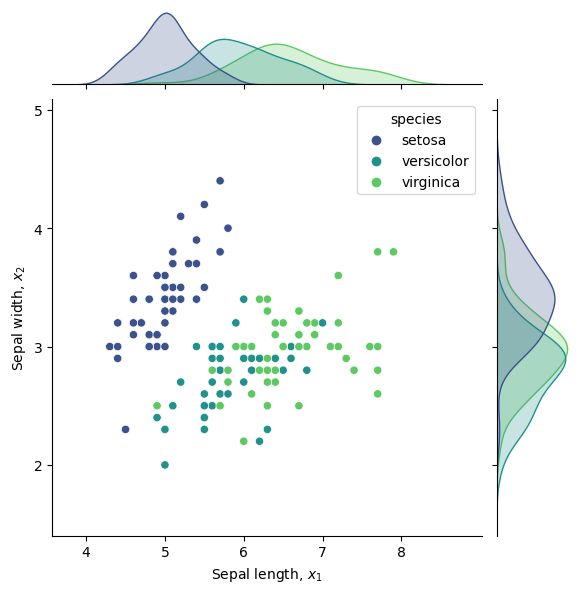

In [3]:
ax = sns.jointplot(data=iris[['sepal_length','sepal_width','species']], 
              x = 'sepal_length',
              y = 'sepal_width',
              hue = 'species',
              palette = "viridis")

ax.ax_joint.set_xlabel('Sepal length, $x_1$')
ax.ax_joint.set_xticks([4,5,6,7,8])
ax.ax_joint.set_ylabel('Sepal width, $x_2$')
ax.ax_joint.set_yticks([2,3,4,5])

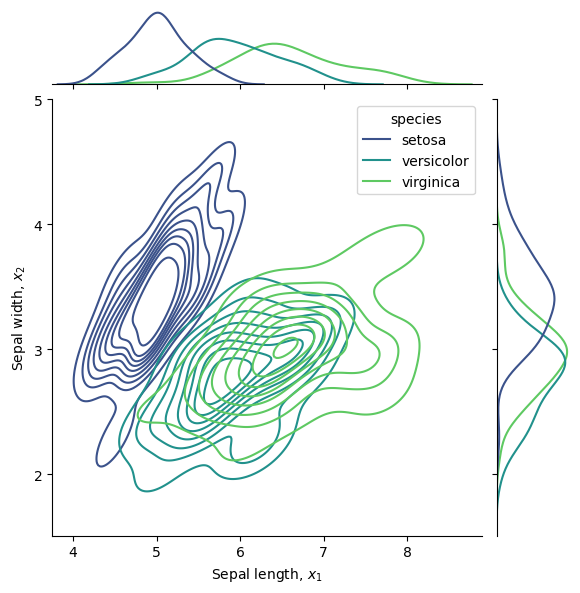

In [4]:
ax = sns.jointplot(data=iris[['sepal_length','sepal_width','species']], 
              x = 'sepal_length',
              y = 'sepal_width',
              hue = 'species',
              palette = "viridis", 
              kind="kde")

ax.ax_joint.set_xlabel('Sepal length, $x_1$')
ax.ax_joint.set_xticks([4,5,6,7,8])
ax.ax_joint.set_ylabel('Sepal width, $x_2$')
ax.ax_joint.set_yticks([2,3,4,5])

## Logistic regression

In [6]:
import numpy as np

clf = LogisticRegression()
clf.fit(X, y)

X1_test = np.linspace(X[:,0].min()*0.9,
                      X[:,0].max()*1.1,
                      num = 101)

X2_test = np.linspace(X[:,1].min()*0.9,
                      X[:,1].max()*1.1,
                      num = 101)

xx1, xx2 = np.meshgrid(X1_test,X2_test)
X_test = np.c_[xx1.ravel(), xx2.ravel()];

y_hat = clf.predict(X_test)
y_hat = y_hat.reshape(xx1.shape)

y_prob = clf.predict_proba(X_test)

b1 = clf.coef_
b0 = clf.intercept_

## probabilities

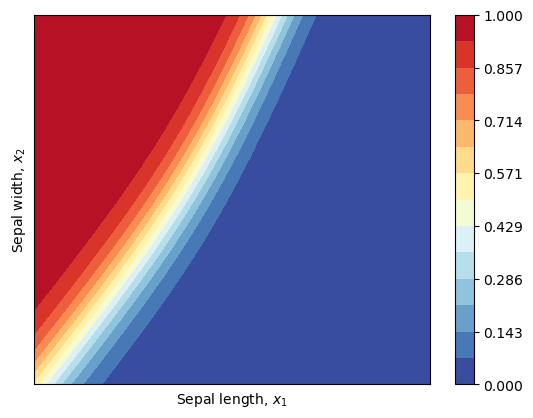

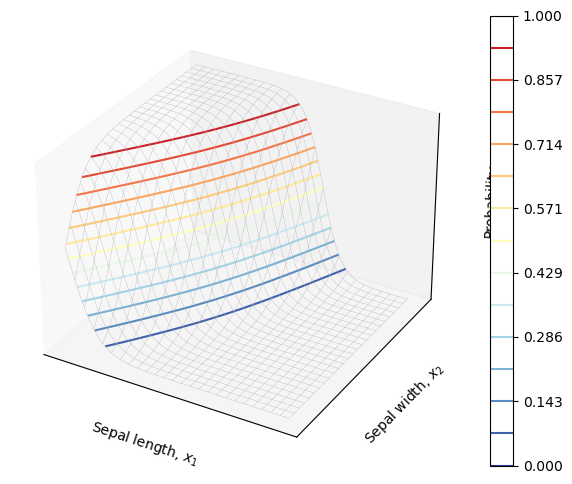

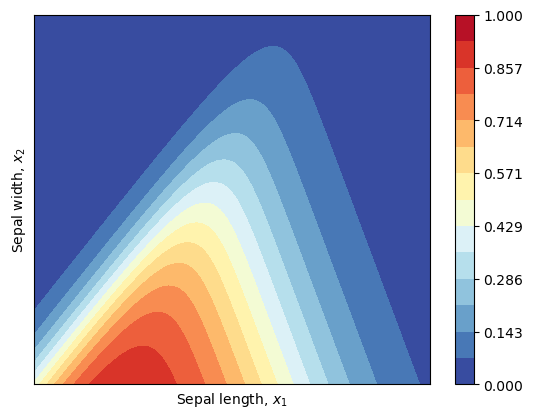

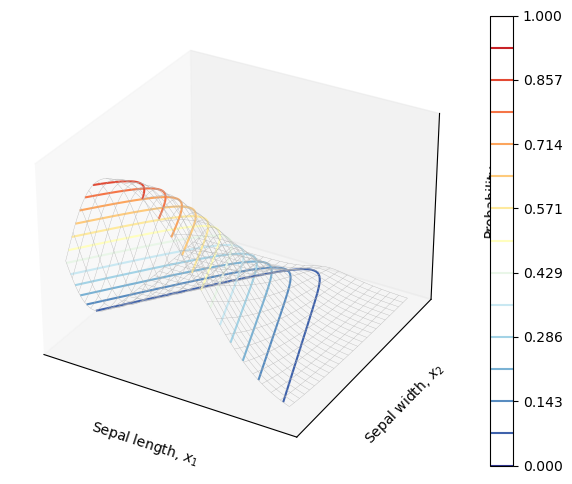

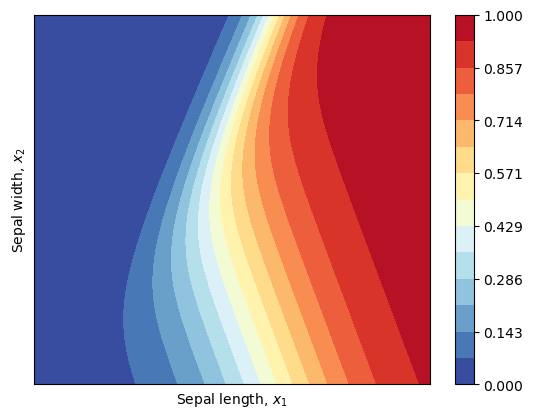

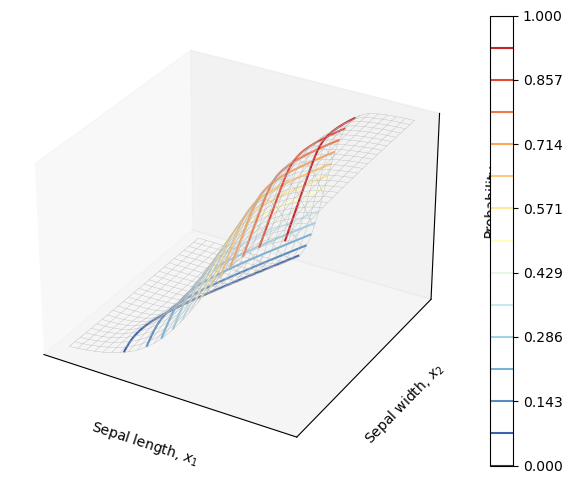

In [7]:
levels = np.linspace(0,1,15)

for i in np.arange(3):
    prob_class_i = y_prob[:,i].reshape(xx1.shape)
    
    fig, ax = plt.subplots()
    contour_h = ax.contourf(xx1,xx2, prob_class_i,
                levels = levels, cmap='RdYlBu_r')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('Sepal length, $x_1$')
    ax.set_ylabel('Sepal width, $x_2$')
    cb = plt.colorbar(contour_h)
    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    
    # Plot a basic wireframe.
    ax.plot_wireframe(xx1,xx2, prob_class_i, 
                      rstride=4, cstride=4, 
                      color = [0.7,0.7,0.7],
                      linewidth = 0.25)
    contour_h = ax.contour3D(xx1,xx2, prob_class_i, 
                 levels = levels, cmap='RdYlBu_r')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_xlabel('Sepal length, $x_1$')
    ax.set_ylabel('Sepal width, $x_2$')
    ax.set_zlabel('Probability')
    ax.set_proj_type('ortho')
    plt.tight_layout()
    cb = plt.colorbar(contour_h)
    

## Decision boundary

In [9]:
from matplotlib.colors import ListedColormap
rgb = [[255, 238, 255],  # red
       [219, 238, 244],  # blue
       [228, 228, 228]]  # black
rgb = np.array(rgb)/255.

cmap_light = ListedColormap(rgb)
cmap_bold = [[255, 51, 0], [0, 153, 255],[138,138,138]]
cmap_bold = np.array(cmap_bold)/255.

C:\Users\james\anaconda3\lib\site-packages\seaborn\_oldcore.py:200: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


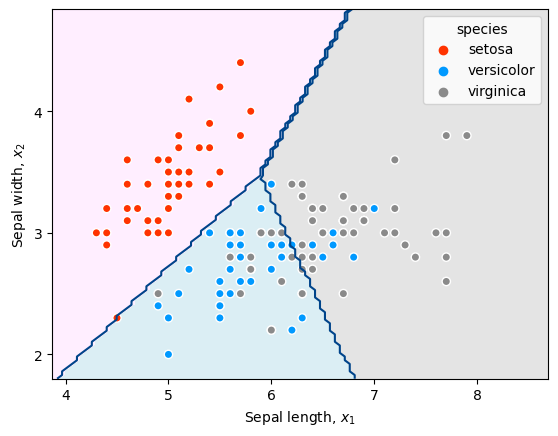

In [10]:
# visualization
fig, ax = plt.subplots()

# plot decision regions
plt.contourf(xx1, xx2, y_hat, cmap=cmap_light)

# plot decision boundaries
plt.contour(xx1, xx2, y_hat, levels=[0,1,2], colors=np.array([0, 68, 138])/255.)

# Plot data points
sns.scatterplot(x=iris['sepal_length'], y=iris['sepal_width'], hue=iris['species'],
                palette=cmap_bold, alpha=1.0, 
                linewidth = 1, edgecolor=[1,1,1])

ax.set_xlabel('Sepal length, $x_1$')
ax.set_xticks([4,5,6,7,8])
ax.set_ylabel('Sepal width, $x_2$')
ax.set_yticks([2,3,4])